# Data Cleaning for Fox News Articles

In [1]:
#Importing libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string
import contractions
import unicodedata
import re

In [2]:
# Loading DataFrame
df = pd.read_csv("Fox_News_Data.csv")

In [3]:
#Lets look at the dataframe
df

,Unnamed: 0,Title,Description,Link
0,0,Moderate Dems silent as Biden skirts Senate co...,Senate Democrats were silent when asked by Fox...,/politics/moderate-dems-silent-biden-skirts-se...
1,1,DC jury orders conservative commentator to pay...,Two conservative commentators were found guilt...,/politics/dc-jury-orders-conservative-commenta...
2,2,AOC declares victory in fight for Green New De...,Rep. Alexandria Ocasio-Cortez declared victory...,/politics/aoc-declares-victory-fight-green-new...
3,3,Why gas stove owners should still be worried,The Biden administration is backtracking on en...,/opinion/why-gas-stove-owners-should-still-wor...
4,4,State AGs warn Biden's natural gas moratorium ...,FIRST ON FOX: A group of nearly two dozen stat...,/politics/state-ags-warn-bidens-natural-gas-mo...
...,...,...,...,...
245,245,John Kerry's climate office faces GOP Oversigh...,FIRST ON FOX: The House Oversight Committee is...,/politics/john-kerrys-climate-office-faces-gop...
246,246,Biden's latest climate rules crack down on man...,The Environmental Protection Agency unveiled a...,/politics/bidens-latest-climate-rules-crack-do...
247,247,Biden admin sued for hiding John Kerry's staff...,FIRST ON FOX: The Biden administration was hit...,/politics/biden-admin-sued-hiding-john-kerrys-...
248,248,TikTok activist says he advised White House on...,A climate change activist who has a large foll...,/politics/tiktok-activist-says-he-advised-whit...


In [4]:
#mMaking a copy of the data
df_1=df

In [5]:
#Removing NAN
df_1 = df_1[df_1['Description'] != 'nan']
df_1 = df_1[df_1['Title'] != 'nan']

In [6]:
# Cleaning Data - Fixing Contractions
df_1['Title'] = df['Title'].apply(lambda x: contractions.fix(x))
df_1['Description'] = df['Description'].apply(lambda x: contractions.fix(x))
df_1.head()

,Unnamed: 0,Title,Description,Link
0,0,Moderate Dems silent as Biden skirts Senate co...,Senate Democrats were silent when asked by Fox...,/politics/moderate-dems-silent-biden-skirts-se...
1,1,DC jury orders conservative commentator to pay...,Two conservative commentators were found guilt...,/politics/dc-jury-orders-conservative-commenta...
2,2,AOC declares victory in fight for Green New De...,Rep. Alexandria Ocasio-Cortez declared victory...,/politics/aoc-declares-victory-fight-green-new...
3,3,Why gas stove owners should still be worried,The Biden administration is backtracking on en...,/opinion/why-gas-stove-owners-should-still-wor...
4,4,State AGs warn Biden's natural gas moratorium ...,FIRST ON FOX: A group of nearly two dozen stat...,/politics/state-ags-warn-bidens-natural-gas-mo...


In [7]:
#Normalizing
df_1['Title'] = df_1['Title'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8'))
df_1['Description'] = df_1['Description'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8'))
df_1.head()

,Unnamed: 0,Title,Description,Link
0,0,Moderate Dems silent as Biden skirts Senate co...,Senate Democrats were silent when asked by Fox...,/politics/moderate-dems-silent-biden-skirts-se...
1,1,DC jury orders conservative commentator to pay...,Two conservative commentators were found guilt...,/politics/dc-jury-orders-conservative-commenta...
2,2,AOC declares victory in fight for Green New De...,Rep. Alexandria Ocasio-Cortez declared victory...,/politics/aoc-declares-victory-fight-green-new...
3,3,Why gas stove owners should still be worried,The Biden administration is backtracking on en...,/opinion/why-gas-stove-owners-should-still-wor...
4,4,State AGs warn Biden's natural gas moratorium ...,FIRST ON FOX: A group of nearly two dozen stat...,/politics/state-ags-warn-bidens-natural-gas-mo...


In [8]:
# Cleaning Data - Removing whitespaces
df_1['Title'] = df_1['Title'].apply(lambda x: ' '.join(x.split()))
df_1['Description'] = df_1['Description'].apply(lambda x: ' '.join(x.split()))
df_1.head()

,Unnamed: 0,Title,Description,Link
0,0,Moderate Dems silent as Biden skirts Senate co...,Senate Democrats were silent when asked by Fox...,/politics/moderate-dems-silent-biden-skirts-se...
1,1,DC jury orders conservative commentator to pay...,Two conservative commentators were found guilt...,/politics/dc-jury-orders-conservative-commenta...
2,2,AOC declares victory in fight for Green New De...,Rep. Alexandria Ocasio-Cortez declared victory...,/politics/aoc-declares-victory-fight-green-new...
3,3,Why gas stove owners should still be worried,The Biden administration is backtracking on en...,/opinion/why-gas-stove-owners-should-still-wor...
4,4,State AGs warn Biden's natural gas moratorium ...,FIRST ON FOX: A group of nearly two dozen stat...,/politics/state-ags-warn-bidens-natural-gas-mo...


In [9]:
#Removing Punctuations
df_1['Title'] = df_1['Title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_1['Description'] = df_1['Description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_1.head()

,Unnamed: 0,Title,Description,Link
0,0,Moderate Dems silent as Biden skirts Senate co...,Senate Democrats were silent when asked by Fox...,/politics/moderate-dems-silent-biden-skirts-se...
1,1,DC jury orders conservative commentator to pay...,Two conservative commentators were found guilt...,/politics/dc-jury-orders-conservative-commenta...
2,2,AOC declares victory in fight for Green New De...,Rep Alexandria OcasioCortez declared victory i...,/politics/aoc-declares-victory-fight-green-new...
3,3,Why gas stove owners should still be worried,The Biden administration is backtracking on en...,/opinion/why-gas-stove-owners-should-still-wor...
4,4,State AGs warn Bidens natural gas moratorium v...,FIRST ON FOX A group of nearly two dozen state...,/politics/state-ags-warn-bidens-natural-gas-mo...


In [10]:
# Initialize the Snowball Stemmer for English
stemmer = SnowballStemmer('english')

df_1['Description'] = df_1['Description'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
df_1['Title'] = df_1['Title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
df_1.head()

,Unnamed: 0,Title,Description,Link
0,0,moder dem silent as biden skirt senat confirm ...,senat democrat were silent when ask by fox new...,/politics/moderate-dems-silent-biden-skirts-se...
1,1,dc juri order conserv comment to pay 1m for de...,two conserv comment were found guilti thursday...,/politics/dc-jury-orders-conservative-commenta...
2,2,aoc declar victori in fight for green new deal...,rep alexandria ocasiocortez declar victori in ...,/politics/aoc-declares-victory-fight-green-new...
3,3,whi gas stove owner should still be worri,the biden administr is backtrack on energi eff...,/opinion/why-gas-stove-owners-should-still-wor...
4,4,state ag warn biden natur gas moratorium viola...,first on fox a group of near two dozen state a...,/politics/state-ags-warn-bidens-natural-gas-mo...


In [11]:
#df_1.to_csv("Fox_News_data_after_Stemming.csv")

In [12]:
# Task 2: Lemmatization
lemmatizer = WordNetLemmatizer()

df_1['Description'] = df_1['Description'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
df_1['Title'] = df_1['Title'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
df_1.head()

,Unnamed: 0,Title,Description,Link
0,0,moder dem silent a biden skirt senat confirm f...,senat democrat were silent when ask by fox new...,/politics/moderate-dems-silent-biden-skirts-se...
1,1,dc juri order conserv comment to pay 1m for de...,two conserv comment were found guilti thursday...,/politics/dc-jury-orders-conservative-commenta...
2,2,aoc declar victori in fight for green new deal...,rep alexandria ocasiocortez declar victori in ...,/politics/aoc-declares-victory-fight-green-new...
3,3,whi gas stove owner should still be worri,the biden administr is backtrack on energi eff...,/opinion/why-gas-stove-owners-should-still-wor...
4,4,state ag warn biden natur gas moratorium viola...,first on fox a group of near two dozen state a...,/politics/state-ags-warn-bidens-natural-gas-mo...


In [13]:
#df_1.to_csv("Fox_news_data_after_Lemmatization.csv")

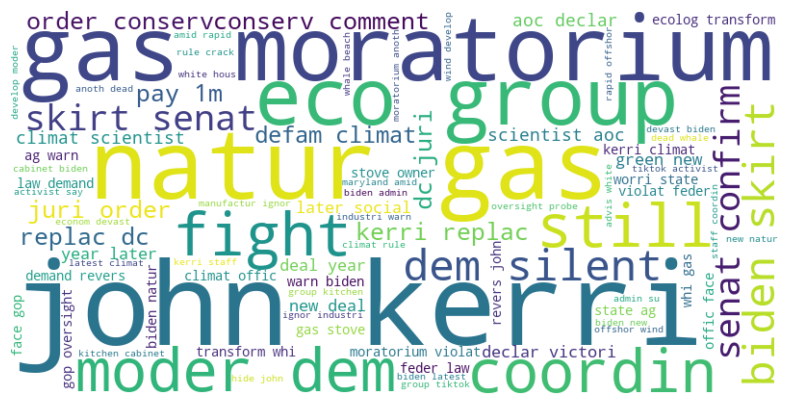

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate 'Title' and 'Description' columns
text = ' '.join(df_1['Title']) + ' ' + ' '.join(df_1['Title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# Task 3: CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=1000)
count_matrix = count_vectorizer.fit_transform(df_1['Description'])
count_df_1 = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
count_df_1.head()

,action,activist,addit,administr,after,agenc,agenda,ahead,alexandria,alleg,...,way,week,were,whale,when,white,who,with,without,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#df_1.to_csv("Fox_Data_CountVectorization.csv")

In [17]:
count_matrix = count_vectorizer.fit_transform(df_1['Title'])
count_df_2 = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
count_df_2.head()

,1m,activist,admin,advis,ag,amid,and,anoth,aoc,be,...,victori,violat,warn,whale,whi,white,wind,with,worri,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [18]:
# Task 4: TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_1['Description'])
tfidf_df_1 = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_1.head()

,action,activist,addit,administr,after,agenc,agenda,ahead,alexandria,alleg,...,way,week,were,whale,when,white,who,with,without,work
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.156492,0.0,0.197143,0.0,0.000000,0.0,0.197143,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.200734,0.0,0.000000,0.0,0.200734,0.0,0.000000,0.0
2,0.0,0.0,0.212064,0.000000,0.000000,0.0,0.000000,0.0,0.212064,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.178823,0.225274,0.0,0.225274,0.0,0.000000,0.0,...,0.225274,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [19]:
#df_1.to_csv("Fox_Data_tfidfVectorization.csv")

In [20]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df_1['Title'])
tfidf_df_2 = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_2.head()

,1m,activist,admin,advis,ag,amid,and,anoth,aoc,be,...,victori,violat,warn,whale,whi,white,wind,with,worri,year
0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.304388,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.0000,0.0,0.271142,0.0,0.271142,0.000000,...,0.271142,0.0000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.271142
3,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.366342,...,0.000000,0.0000,0.00000,0.0,0.366342,0.0,0.0,0.0,0.366342,0.000000
4,0.000000,0.0,0.0,0.0,0.3226,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.3226,0.25608,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
